# **Customer Segmentatation using K-MEANS Clustering Model**
###### Dataset: Mall Customer Dataset (Source: Kagge.com)

###### Customer segmentation is a critical task in data science that involves grouping customers into distinct categories based on their behaviors, characteristics, and preferences. One of the most popular techniques for customer segmentation is the K-MEANS clustering model, which is an unsupervised machine learning algorithm that groups similar customers together based on their similarity in features such as purchase history, demographic data, and other relevant data.

###### K-MEANS clustering is a powerful tool for discovering patterns and trends in large datasets, enabling businesses to identify hidden insights and opportunities that can inform targeted marketing strategies and product recommendations. The algorithm uses an iterative approach to minimize the sum of distances between data points and centroids, resulting in optimal clusters that represent distinct customer segments.

###### By using K-MEANS clustering for customer segmentation, businesses can gain a better understanding of their customers and tailor their offerings to meet their specific needs and preferences, ultimately leading to increased customer satisfaction and loyalty.






### **Description of the Attributes**



1.   **Customer ID**: A unique identifier for each customer in the dataset.
2.   **Gender**: The gender of the customer, which may be either male or female.
3.   **Age**: The age of the customer, typically ranging from 18 to 70 years.
4.   **Annual Income (in thousands**): The annual income of the customer, measured in thousands of dollars.
5.   Spending Score (1-100): A score assigned to each customer based on their spending habits and purchasing behavior at the mall, with higher scores indicating higher spending levels. 

**Importing Required Libraried**

In [64]:
import numpy as np  # for numerical computing
import pandas as pd  # for data manipulation and analysis
from sklearn.preprocessing import StandardScaler  # for data preprocessing
from sklearn.cluster import KMeans  # for K-Means clustering
import matplotlib.pyplot as plt  # for data visualization
import seaborn as sns  # for more advanced data visualization
import joblib # to save model

**Loading in the dataset into a dataframe**

In [5]:
data = pd.read_csv('/content/Mall_Customers (1).csv')

data.sample(3)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
114,115,Female,18,65,48
140,141,Female,57,75,5
24,25,Female,54,28,14


**Inspecting the dataframe**

In [6]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
data.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


###### Our data looks clean with no null values and consistent data types. One simple issue is to change the attribute name 'Genre' to 'Gender'

In [10]:
data = data.rename(columns={'Genre': 'Gender'})

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**K-MEANS Clustering**

In [13]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [51]:
# Select the columns we want to use for clustering.

# The basis for selecting the columns to be used for clustering in a K-Means algorithm depends on the problem you are trying to solve and the characteristics of your dataset. 
# In general, you want to select columns that are relevant to the problem at hand and that capture meaningful variations in the data.

# I want to use Annual Income and Spending Score for my clustering


X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [52]:
X.sample(2)

,Annual Income (k$),Spending Score (1-100)
22,25,5
84,54,57


In [24]:
# # Standardize the data using the StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [53]:
# Create a KMeans object with the desired number of clusters

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

##### **Using the elbow method to determine the optimal number of clusters**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

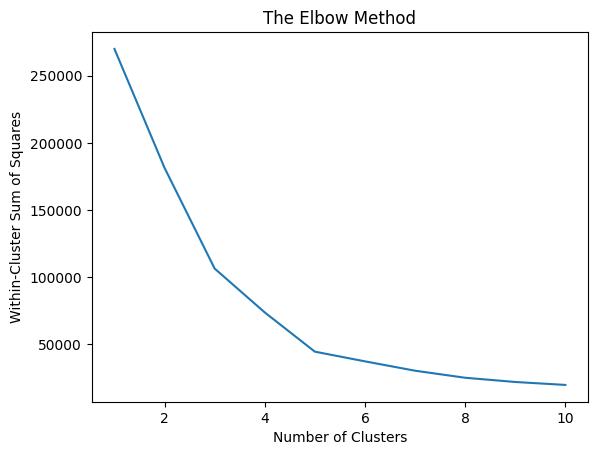

In [54]:
# Initialize empty list to store WCSS values for each number of clusters
wcss = []

# Loop through different numbers of clusters and calculate WCSS for each
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss);
plt.title('The Elbow Method');
plt.xlabel('Number of Clusters');
plt.ylabel('Within-Cluster Sum of Squares');
plt.show();

The optimal no is 5

**Training the Model**

In [55]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [56]:
# # Standardize the data using the StandardScaler

# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [57]:
# Create a KMeans object with the desired number of clusters

kmeans = KMeans(n_clusters=6, random_state=42)
y_means = kmeans.fit_predict(X)

y_means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
       4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 5, 0, 5, 1, 5, 0, 5, 0, 5,
       1, 5, 0, 5, 0, 5, 0, 5, 0, 5, 1, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5, 0, 5,
       0, 5, 0, 5, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

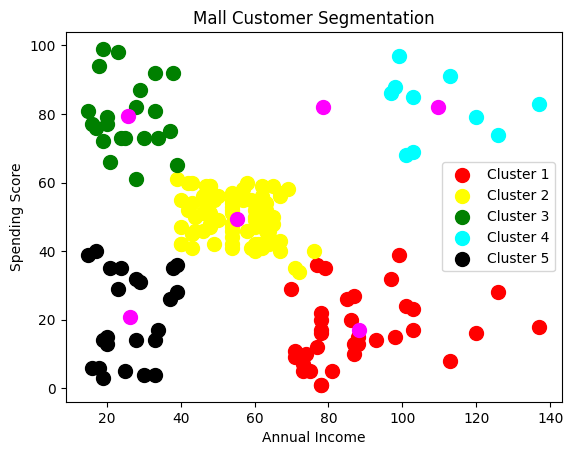

In [60]:
plt.scatter(X.iloc[y_means == 0, 0], X.iloc[y_means == 0, 1], s = 100, c = 'red', label = "Cluster 1")
plt.scatter(X.iloc[y_means == 1, 0], X.iloc[y_means == 1, 1], s = 100, c = 'yellow', label = "Cluster 2")
plt.scatter(X.iloc[y_means == 2, 0], X.iloc[y_means == 2, 1], s = 100, c = 'green', label = "Cluster 3")
plt.scatter(X.iloc[y_means == 3, 0], X.iloc[y_means == 3, 1], s = 100, c = 'cyan', label = "Cluster 4")
plt.scatter(X.iloc[y_means == 4, 0], X.iloc[y_means == 4, 1], s = 100, c = 'black', label = "Cluster 5")

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s= 100, c= 'magenta')
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Mall Customer Segmentation")
plt.legend()
plt.show()

Our Data is now divided into Clusters

In [63]:
kmeans.predict([[20, 43]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

This shows that customer with the variables entered above would likely fall into the cluster 5

**Save the model**

In [65]:
joblib.dump(kmeans, "Mall Customer Segmentation")

['Mall Customer Segmentation']

In [68]:
# to load the saved model

model = joblib.load("Mall Customer Segmentation")

In [74]:
model.predict([[65, 48]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

### Conclusion

###### For this project, I utilized the popular mall customers dataset to train a clustering model using K-means clustering. The model considered two variables, namely spending score and annual income, and was evaluated using metrics such as silhouette score and elbow method.

###### The K-means clustering model identified 5 distinct clusters of mall customers based on their spending habits and annual income. The insights gained from the clustering model included the identification of the most important features that drove customer segmentation. We found that spending score and annual income were the most important predictors of customer segmentation.

###### The implications of the K-means clustering model are significant. It enables the creation of targeted marketing campaigns for each of the 5 customer segments. For example, customers in the high-income and high-spending score segment could be targeted with premium products and personalized offers, while customers in the low-income and low-spending score segment could be targeted with lower-priced products and special discounts.

###### In conclusion, the K-means clustering model achieved a good level of segmentation accuracy, with the identification of 5 distinct clusters. The insights gained from the model can be used to inform business decisions and create targeted marketing campaigns. However, it is important to further validate the model's performance on a larger and more diverse dataset to ensure its reliability and accuracy.